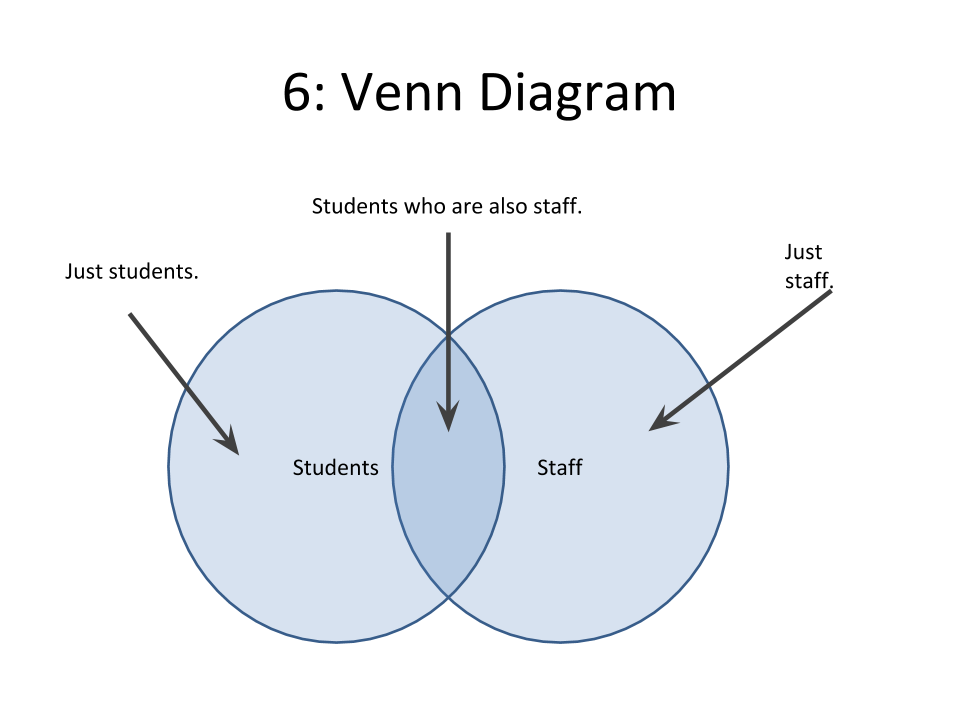

In [8]:
from PIL import Image
from IPython.display import display

im = Image.open('./resources/week-3/merging1.png')
display(im)

First, what do we want a list of all the people regardless of whether they're staff or student, and all of the information we can get on them? In database terminology, this is called a full Outer join. In set theory, it's called a Union. In the Venn diagram, it represents everyone in any circle.

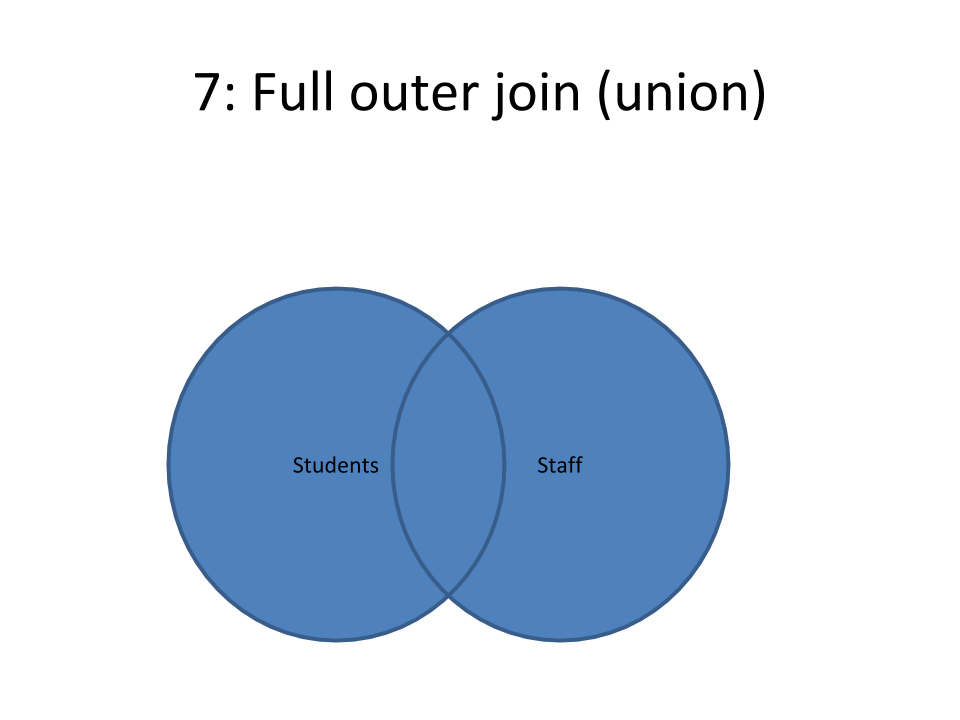

In [9]:
im = Image.open('./resources/week-3/merging2.png')
display(im)

It's quite possible though that we only want those people who have maximum information for, those people who are both staff and students. Perhaps being a staff member and the student involves getting a tuition waiver, we want to calculate the cost of this. In database terminology, this is called an inner join, or in set theory, the intersection. It's represented in the Venn diagram as an overlapping part in each circle.

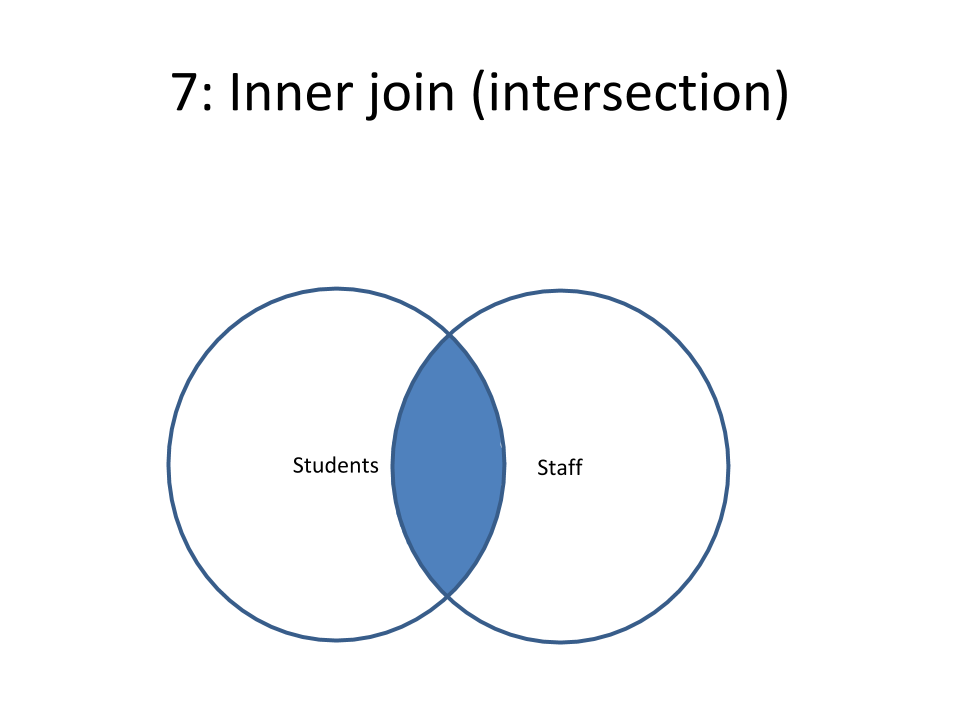

In [10]:
im = Image.open('./resources/week-3/merging3.png')
display(im)

In [1]:
# let's do this in pandas
import pandas as pd

# creating 2 dataframes, staff and students
# dataframe 一定要用把 dict 變成 list?
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
# index these staff by name
staff_df = staff_df.set_index('Name')

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')

# printing out the dataframe
print(staff_df.head())
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader
            School
Name              
James     Business
Mike           Law
Sally  Engineering


There are some overlap in these dataframes in that James and Sally are both students and staff. Importantly, both dataframes are indexed along the value we want to merge them on, which is called Name.

In [12]:
# if we want the union of these, we would call merge() and telling merge that we want it to use an outer join. 
# We want to use the left and right indices as the joining columns

pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


We see in the resulting DataFrame that everybody is listed and since Mike does not have a role and Kelly does not have a school, those cells are listed as missing values.

In [13]:
# if we want to get the intersection, that is, just those who are a student AND a staff

pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)
# again, we set both left and right indices to be true as the joining columns

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


There are only James and Sally in the resulting dataframe

There are two other common use cases when merging DataFrames, which called set addition. The first is when we want to get a list of all staff regardless of whether they're students or not. But if there were students, we'd want to get their student details as well. 

In [14]:
# we would use a left join. It's important to note that the order of DataFrames in this function, 
# the first DataFrame is the left DataFrame and the second is the right.

pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [15]:
# or we want a list of all the students and their roles if they were also staff. We'll use right join
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


We can also do it one other way. We don't need to use indices to join on, we can use columns as well. Here we have a parameter called "on" and then we can assign a column that both DataFrames, using the joining column.

In [16]:
# let's remove the index.
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()

pd.merge(staff_df, student_df, how='right', on='Name')

,Name,Role,School
0,Sally,Course liasion,Engineering
1,James,Grader,Business
2,Mike,NaN,Law


What happens when we have conflicts between the DataFrames?

In [17]:
# Let's take a look by creating new staff and student DataFrames that have a location information.

staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
staff_df = staff_df.set_index('Name')

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Franternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])

In the staff DataFrame, location means an office location. But for the student DataFrame, the location information is actually their home address. The merge function preserves this information, but depends either on an _x or _y to help differentiate which index went with which column of data. The _x is always the left DataFrame and the _y is always the right DataFrame.

In [18]:
# if we want all of the staff information, regardless of whether they are students or not, but if they are students, 
# we want to get their student details as well, then we would do a left join on the column of name.
pd.merge(staff_df, student_df, how='left', on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


Location_x refers to the staff_df, Location_y refers to the student_df

Let's talk about multi indexing and multiple columns. It's possible that the first name for students and staff might overlap, but the last name might not. We can use a list of multiple columns that should be used to join keys from both dataframes using the 'on' parameter. Recall that the column name assigned to the 'on' parameter need to exist in both dataframes.

In [2]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])

student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])

# we pass a list to 'on' parameter
pd.merge(staff_df, student_df, on=['First Name', 'Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


We need to know how to pull data from different sources. If we think of merging as joining 'horizontally' meaning we join on similar values in a column found in two dataframes, then concatenating is joining 'vertically' meaning we put dataframes on top or at the bottom of one another.

Let's understand this from an example. We have a dataset that tracks some information over the years, and each year's record is separate CSV, and every CSV of every year's record has the exact same columns. What happens if we want to put all of that data, from all of the records together so we can concatenate them? 

The US Department of Education College Scorecard data has each US university's data on student completion, student debt, after graduation income, and others. The data is stored in separate CSVs, with each CSV containing a year's record. That's say we wanted the records from 2011-2013. We create first three dataframes, each containing one year's record, and because the CSV files we're working with are messy, we want to suppress some of the Jupyter warning messages and just tell read_csv to ignore bad lines. So we're going to start the cell with the cell magic, %%capture. It's just to suppress output as we're loading these CSV files because there are errors in them.

In [5]:
%%capture
# the magic needs to be on the first line of each cell

df_2011 = pd.read_csv("resources/week-3/datasets/college_scorecard/MERGED2011_12_PP.csv", error_bad_lines=False)
df_2012 = pd.read_csv("resources/week-3/datasets/college_scorecard/MERGED2012_13_PP.csv", error_bad_lines=False)
df_2013 = pd.read_csv("resources/week-3/datasets/college_scorecard/MERGED2013_14_PP.csv", error_bad_lines=False)

In [7]:
df_2011.head(3)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654.0,100200.0,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663.0,105200.0,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690.0,2503400.0,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(len(df_2011))
print(len(df_2012))
print(len(df_2013))

15235
7793
7804


In [9]:
# let's put 3 dataframes in a list and call that list frames and pass the list into the concat() function
# 把 3 個 list 疊在一起，會有 15235 + 7793 + 7804 個 row

frames = [df_2011, df_2012, df_2013]
pd.concat(frames)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654.0,100200.0,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663.0,105200.0,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690.0,2503400.0,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706.0,105500.0,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724.0,100500.0,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,100751.0,105100.0,1051,The University of Alabama,Tuscaloosa,AL,35487-0166,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,100760.0,100700.0,1007,Central Alabama Community College,Alexander City,AL,35010,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,100812.0,100800.0,1008,Athens State University,Athens,AL,35611,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100830.0,831000.0,8310,Auburn University at Montgomery,Montgomery,AL,36117-3596,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100858.0,100900.0,1009,Auburn University,Auburn,AL,36849,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
len(df_2011)+len(df_2012)+len(df_2013)

30832

30832 corresponds the result of concat()! 

In [11]:
# But not all of the data is concatenated together, we don't know what observations are from what year anymore. 
# concat() has a parameter that solves such a problem with the keys parameter, and we can set an extra level of index. 
# We pass in a list of the keys that we want to correspond to the dataframes in as the keys parameter.

pd.concat(frames, keys=['2011', '2012', '2013'])

UNITID      OPEID OPEID6  \
2011 0       100654.0   100200.0   1002   
     1       100663.0   105200.0   1052   
     2       100690.0  2503400.0  25034   
     3       100706.0   105500.0   1055   
     4       100724.0   100500.0   1005   
...               ...        ...    ...   
2013 7799  48285703.0   157107.0   1571   
     7800  48285704.0   157101.0   1571   
     7801  48285705.0   157105.0   1571   
     7802  48285706.0   157100.0   1571   
     7803  48285707.0   157103.0   1571   

                                                  INSTNM            CITY  \
2011 0                          Alabama A & M University          Normal   
     1               University of Alabama at Birmingham      Birmingham   
     2                                Amridge University      Montgomery   
     3               University of Alabama in Huntsville      Huntsville   
     4                          Alabama State University      Montgomery   
...                                                  ...             ...   
2013 7799       Georgia Military College-Columbus Campus        Columbus   
     7800       Georgia Military College-Valdosta Campus        Valdosta   
     7801  Georgia Military College-Warner Robins Campus   Warner Robins   
     7802                Georgia Military College-Online   Milledgeville   
     7803        Georgia Military College-Stone Mountain  Stone Mountain   

          STABBR         ZIP  ACCREDAGENCY INSTURL NPCURL  ...  \
2011 0        AL       35762           NaN     NaN    NaN  ...   
     1        AL  35294-0110           NaN     NaN    NaN  ...   
     2        AL  36117-3553           NaN     NaN    NaN  ...   
     3        AL       35899           NaN     NaN    NaN  ...   
     4        AL  36104-0271           NaN     NaN    NaN  ...   
...          ...         ...           ...     ...    ...  ...   
2013 7799     GA       31909           NaN     NaN    NaN  ...   
     7800     GA       31605           NaN     NaN    NaN  ...   
     7801     GA       31093           NaN     NaN    NaN  ...   
     7802     GA       31061           NaN     NaN    NaN  ...   
     7803     GA       30083           NaN     NaN    NaN  ...   

          OMAWDP8_NOTFIRSTTIME_POOLED_SUPP OMENRUP_NOTFIRSTTIME_POOLED_SUPP  \
2011 0                                 NaN                              NaN   
     1                                 NaN                              NaN   
     2                                 NaN                              NaN   
     3                                 NaN                              NaN   
     4                                 NaN                              NaN   
...                                    ...                              ...   
2013 7799                              NaN                              NaN   
     7800                              NaN                              NaN   
     7801                              NaN                              NaN   
     7802                              NaN                              NaN   
     7803                              NaN                              NaN   

          OMENRYP_FULLTIME_POOLED_SUPP OMENRAP_FULLTIME_POOLED_SUPP  \
2011 0                             NaN                          NaN   
     1                             NaN                          NaN   
     2                             NaN                          NaN   
     3                             NaN                          NaN   
     4                             NaN                          NaN   
...                                ...                          ...   
2013 7799                          NaN                          NaN   
     7800                          NaN                          NaN   
     7801                          NaN                          NaN   
     7802                          NaN                          NaN   
     7803                          NaN                        

Now we have the indices as the year. So we know what observations are from what year. Notice that concatenation also has inner and outer methods. If we're concatenating two dataframes that do not have identical columns, and choose the outer methods, some cells will be NaN. If we choose to do the inner, then some observations will be dropped due to NaN values. We can think this as analogous to the left and right joints of the merge function.